In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# load the data

(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

In [3]:
# check the shape of the data
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# from the above shape result: 60000 is the total number of the samples, (28, 28) are the height and width or
# the dimensions of the image

In [5]:
# lets see the 0th index of X_train
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

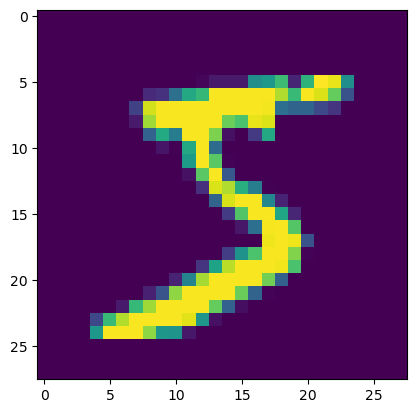

In [6]:
# visualize the 0th image of X_train
plt.imshow(X_train[0])

In [7]:
# check the 0th place of y_train
y_train[0]

5

In [8]:
# flattened the 2D images of X_train and X_test to 1D vector, so that we can pass it as input to the neural network

# to flatten the image to 1D vector we should keep the sample size as it is and multiply the h and w to form the other dim value
X_train_flattened= X_train.reshape(X_train.shape[0], 28*28)
X_test_flattened= X_test.reshape(X_test.shape[0], 28*28)

In [9]:
# recheck the shape of the flattened array
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [10]:
X_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [11]:
# 1st method: Create a simple neural network with only one input layer, and output with activation layer

In [12]:
model= keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation= 'sigmoid')
    
])

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs= 5 )



Epoch 1/5


1875/1875 [==============================] - 2s 807us/step - loss: 9.5231 - accuracy: 0.8432
Epoch 2/5
1875/1875 [==============================] - 1s 798us/step - loss: 6.1474 - accuracy: 0.8780
Epoch 3/5
1875/1875 [==============================] - 2s 810us/step - loss: 5.6666 - accuracy: 0.8834
Epoch 4/5
1875/1875 [==============================] - 2s 797us/step - loss: 5.5223 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 2s 813us/step - loss: 5.3598 - accuracy: 0.8876


In [13]:
# Lets evaluate the on our test data

model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 740us/step - loss: 5.6890 - accuracy: 0.8917


[5.689001560211182, 0.891700029373169]

In [14]:
# check the prediction

y_pred= model.predict(X_test_flattened)
y_pred

313/313 [==============================] - 0s 724us/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 9.9999988e-01, ..., 3.2102194e-16,
        9.3267453e-01, 4.2139255e-26],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.1671938e-05,
        9.0009966e-13, 9.9999911e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [15]:
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 2.8576275e-11, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [16]:
# As we see that the above Prediction is nothing but the probability of output 9 digit, the higher the prob of a number
# the predicted output is that number

In [17]:
# lets take the max probability out using argmax(), which finds the max value from the array and returns its index
np.argmax(y_pred[0])

3

In [18]:
y_pred_labels= [np.argmax(i) for i in y_pred]

In [19]:
# visualizing on the confusion-matrix

cm= tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    4,    1,    2,    1,    0,    0,    1],
       [   1, 1127,    3,    0,    1,    2,    1,    0,    0,    0],
       [  61,  227,  691,   16,    6,    3,    8,    7,    7,    6],
       [  45,   76,  177,  706,    1,    1,    0,    1,    3,    0],
       [   4,   18,    7,   41,  875,    0,   10,    9,    5,   13],
       [  71,   29,   26,  393,   63,  291,    4,    3,   10,    2],
       [  73,   10,  175,    9,   55,  116,  518,    0,    2,    0],
       [  14,   64,   48,  621,   57,   30,    0,  189,    2,    3],
       [  19,  137,   28,  283,   45,  196,   14,   17,  234,    1],
       [   9,   28,    1,  352,  362,   17,    3,  174,   21,   42]])>

Text(95.72222222222221, 0.5, 'Truth')

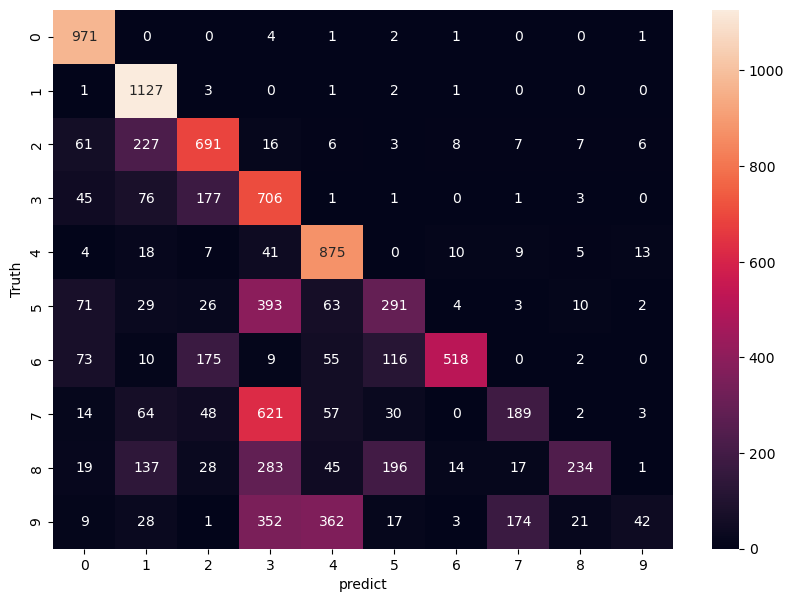

In [20]:
# Lets visualise it in colorful way
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('predict')
plt.ylabel('Truth')

In [21]:
# Now, the reason for this low accuracy can be because of unnormalized data and no hidden layer
# So, lets first try to normalize the data and check the accuracy, to see if any improvement is their or not

In [22]:
X_train_norm= X_train/255
X_test_norm= X_test/255

In [23]:
X_train_norm.shape

(60000, 28, 28)

In [24]:
# X_train_norm[0]

In [25]:
X_train_norm_flattened=  X_train_norm.reshape(len(X_train_norm), 28*28)
X_test_norm_flattened= X_test_norm.reshape(len(X_test_norm), 28*28)

In [26]:
X_train_norm_flattened.shape

(60000, 784)

In [27]:
model1= keras.Sequential([
    keras.layers.Dense(10, input_shape= (784,), activation='relu')
    
])

model1.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    
)

model1.fit(X_train_norm_flattened, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 2s 813us/step - loss: 2.3252 - accuracy: 0.1367
Epoch 2/5
1875/1875 [==============================] - 1s 789us/step - loss: 2.2553 - accuracy: 0.1208
Epoch 3/5
1875/1875 [==============================] - 1s 797us/step - loss: 2.2886 - accuracy: 0.1048
Epoch 4/5
1875/1875 [==============================] - 2s 812us/step - loss: 2.2877 - accuracy: 0.1053
Epoch 5/5
1875/1875 [==============================] - 2s 849us/step - loss: 2.2890 - accuracy: 0.1047


In [28]:
model.evaluate(X_test_norm_flattened,y_test)

313/313 [==============================] - 0s 817us/step - loss: 1.6047 - accuracy: 0.5098


[1.6046730279922485, 0.5098000168800354]

In [29]:
y_pred= model.predict(X_test_norm_flattened)

313/313 [==============================] - 0s 679us/step


Text(95.72222222222221, 0.5, 'Truth')

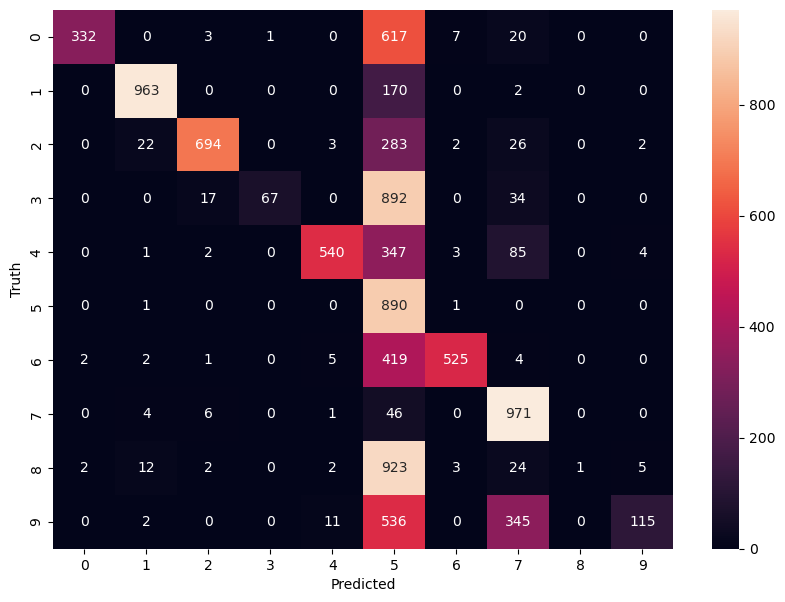

In [30]:
# confusion metric
y_pred_labels= [ np.argmax(i) for i in y_pred]

cm= tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### their is no much improvement in the accuracy, so now lets add hidden layers and try with different activation function

In [31]:
model_n= keras.Sequential([
    keras.layers.Flatten(None), # using flatten func we dont have to explicitly flatten the input 
    keras.layers.Dense(100, activation= 'relu'),
    keras.layers.Dense(10, activation= 'sigmoid') # neuronsa in output layer 
    
])
model.summary()
model_n.compile(optimizer= 'adam',
                loss= 'sparse_categorical_crossentropy',  #we chose this loss instead of categorical_crossentropy because our target column has order of numbers instead of one-hot encoding type values 
                metrics= ['accuracy'])

model_n.fit(X_train_norm_flattened, y_train, epochs= 10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2704 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1207 - accuracy: 0.9646
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0836 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0631 - accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0493 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==================

In [32]:
model_n.evaluate(X_test_norm_flattened, y_test)

313/313 [==============================] - 0s 865us/step - loss: 0.0822 - accuracy: 0.9766


[0.08224015682935715, 0.9765999913215637]

In [33]:
y_pred_n= model.predict(X_test_norm_flattened)

313/313 [==============================] - 0s 662us/step


Text(95.72222222222221, 0.5, 'Truth')

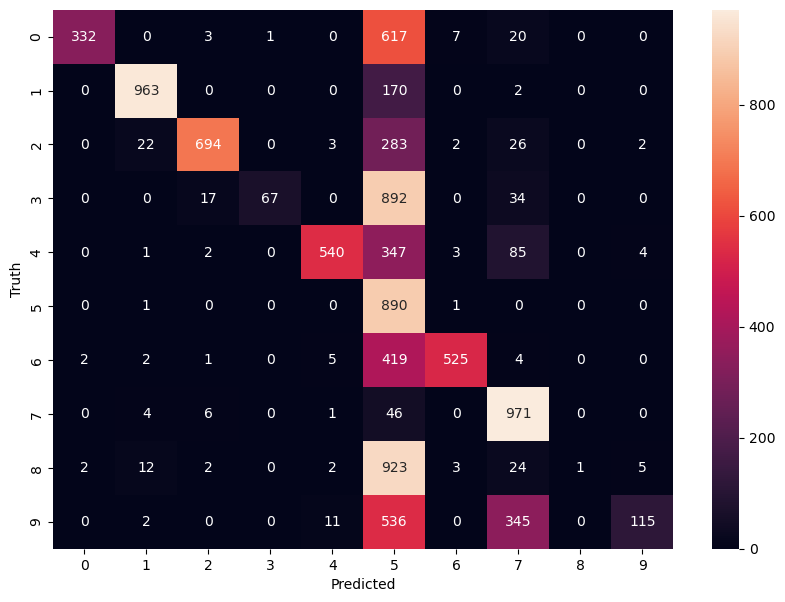

In [34]:
# confusion metric
y_pred_labels_n= [ np.argmax(i) for i in y_pred_n]

cm= tf.math.confusion_matrix(labels= y_test, predictions= y_pred_labels_n)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
y_test[6]

4

In [36]:
np.argmax(y_pred_n[6])

5

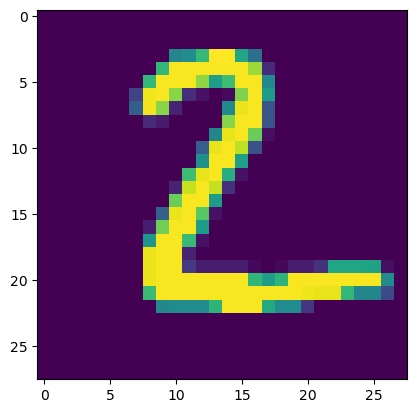

In [37]:
plt.imshow(X_test[1])

In [38]:
28*28

784